In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
players_salaries_csv = "players_salaries.csv"
nba_stats_csv = "nba_stats.csv"
PER_csv = "cleaned_player_with_per_and_draftV2.csv"

players_salaries_df = pd.read_csv(players_salaries_csv)
nba_stats_df = pd.read_csv(nba_stats_csv)
PER_csv_df = pd.read_csv(PER_csv)

#players_salaries_df.columns
reduced_salaries = players_salaries_df[["Name", "Salary"]]
reduced_salaries.head()

,Name,Salary
0,Juhann Begarin,NaN
1,Jaylen Brown,26758928.0
2,Kris Dunn,5005350.0
3,Carsen Edwards,1782621.0
4,Tacko Fall,NaN


In [4]:
reduced_PER = PER_csv_df[["Player", "PER", "YEAR_TOTAL"]]
reduced_PER.head()

,Player,PER,YEAR_TOTAL
0,Delon Wright,13.8,7
1,Jalen Johnson,11.3,1
2,Sharife Cooper,-5.4,1
3,Kevin Huerter,11.9,4
4,Skylar Mays,11.7,2


In [5]:
pd.options.display.float_format = '{:.0f}'.format
reduced_salaries["Salary"].describe()
#Google search says the average salary = $7.3 million; the top 10 highest salaries
#are north of $39 million (i.e. LeBron James and Kevin Durant)
#possibly higher b/c of trades and multiple listings of players and sal per trade

count        445
mean     8813696
std      9886777
min       925258
25%      1802057
50%      4447896
75%     12000000
max     45780966
Name: Salary, dtype: float64

In [6]:
#nba_stats_df.columns
reduced_nba_stats = nba_stats_df[["Player", "Pos", "G"]]
reduced_nba_stats.head()

,Player,Pos,G
0,Precious Achiuwa,C,73
1,Steven Adams,C,76
2,Bam Adebayo,C,56
3,Santi Aldama,PF,32
4,LaMarcus Aldridge,C,47


In [7]:
reduced_nba_stats["G"].describe() 
#yielded min = 1 game, max = 82 games; mean = 37 games

count   812
mean     37
std      26
min       1
25%      12
50%      36
75%      61
max      82
Name: G, dtype: float64

In [8]:
#merge on left on name and right on player
combine_PER_Sal = reduced_nba_stats.merge(reduced_salaries, how ="inner", left_on ="Player", right_on ="Name")
combine_PER_Sal

,Player,Pos,G,Name,Salary
0,Precious Achiuwa,C,73,Precious Achiuwa,2711280
1,Steven Adams,C,76,Steven Adams,17073171
2,Bam Adebayo,C,56,Bam Adebayo,28103500
3,Santi Aldama,PF,32,Santi Aldama,1994520
4,LaMarcus Aldridge,C,47,LaMarcus Aldridge,NaN
...,...,...,...,...,...
609,Thaddeus Young,PF,26,Thaddeus Young,14190000
610,Trae Young,PG,76,Trae Young,8326471
611,Omer Yurtseven,C,56,Omer Yurtseven,1489065
612,Cody Zeller,C,27,Cody Zeller,1669178


In [9]:
#make a new df with player and PER to merge with the reduced df above
all_data = combine_PER_Sal.merge(reduced_PER, how= "outer")
all_data.head(20)

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL
0,Precious Achiuwa,C,73,Precious Achiuwa,2711280,13,2
1,Steven Adams,C,76,Steven Adams,17073171,18,9
2,Bam Adebayo,C,56,Bam Adebayo,28103500,22,5
3,Santi Aldama,PF,32,Santi Aldama,1994520,10,1
4,LaMarcus Aldridge,C,47,LaMarcus Aldridge,NaN,20,16
5,Nickeil Alexander-Walker,SG,65,Nickeil Alexander-Walker,3261480,10,3
6,Nickeil Alexander-Walker,SG,50,Nickeil Alexander-Walker,3261480,10,3
7,Nickeil Alexander-Walker,SG,15,Nickeil Alexander-Walker,3261480,10,3
8,Grayson Allen,SG,66,Grayson Allen,4054695,13,4
9,Jarrett Allen,C,56,Jarrett Allen,20000000,23,5


In [10]:
#Create bins for salary (7 bins in total)
#would it make any sense to only examine the top 10 highest paid and the
#10 lowest paid NBA players? The graph here would be cleaner and less cluttered
salary_bins = [0, 999999, 8999999, 17999999, 26999999, 35999999, 44999999, 54000000]
bin_names = ["Under a million", "1 to 9 mil", "9 to 18 mil", "18 to 27 mil",
            "27 to 36 mil", "36 to 45 mil", "Over 45 mil"]
all_data["Salary Categories"] = pd.cut(all_data["Salary"], bins = salary_bins, labels= bin_names, include_lowest = True)
#Groupby group players into their bins by salary
all_data.head(20)

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
0,Precious Achiuwa,C,73,Precious Achiuwa,2711280,13,2,1 to 9 mil
1,Steven Adams,C,76,Steven Adams,17073171,18,9,9 to 18 mil
2,Bam Adebayo,C,56,Bam Adebayo,28103500,22,5,27 to 36 mil
3,Santi Aldama,PF,32,Santi Aldama,1994520,10,1,1 to 9 mil
4,LaMarcus Aldridge,C,47,LaMarcus Aldridge,NaN,20,16,NaN
5,Nickeil Alexander-Walker,SG,65,Nickeil Alexander-Walker,3261480,10,3,1 to 9 mil
6,Nickeil Alexander-Walker,SG,50,Nickeil Alexander-Walker,3261480,10,3,1 to 9 mil
7,Nickeil Alexander-Walker,SG,15,Nickeil Alexander-Walker,3261480,10,3,1 to 9 mil
8,Grayson Allen,SG,66,Grayson Allen,4054695,13,4,1 to 9 mil
9,Jarrett Allen,C,56,Jarrett Allen,20000000,23,5,18 to 27 mil


In [11]:
#view the data types for each column in new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 694
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Player             695 non-null    object  
 1   Pos                614 non-null    object  
 2   G                  614 non-null    float64 
 3   Name               614 non-null    object  
 4   Salary             503 non-null    float64 
 5   PER                607 non-null    float64 
 6   YEAR_TOTAL         607 non-null    float64 
 7   Salary Categories  503 non-null    category
dtypes: category(1), float64(4), object(3)
memory usage: 44.5+ KB


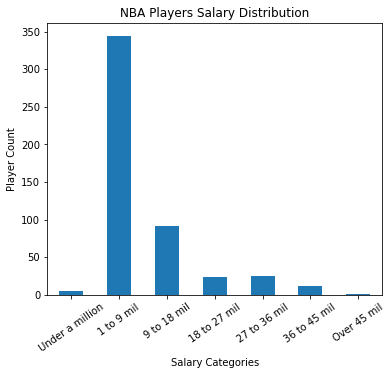

In [34]:
#groupby salary categories to visualize the number of players in each cat
fig, ax = plt.subplots(facecolor="white")
all_data.groupby('Salary Categories').count()["Player"].plot(kind='bar', ax=ax, figsize=(6,5))

plt.xticks(rotation = 35)
plt.title("NBA Players Salary Distribution")
plt.xlabel("Salary Categories")
plt.ylabel("Player Count")
plt.savefig("nba_sal_distrib.png",bbox_inches='tight')
plt.show()

In [14]:
#need min/max of PER to visualize it
all_data["PER"].describe()

count   607
mean     13
std       6
min     -45
25%      11
50%      13
75%      16
max      37
Name: PER, dtype: float64

In [15]:
#statistical summary of ALL salaries by position; average is ~ $8.4 million
print(all_data["Salary"].mean())

8361916.512922465


(-1.1173625220934387,
 1.1008267867663541,
 -1.1169750699498298,
 1.1127361393102928)

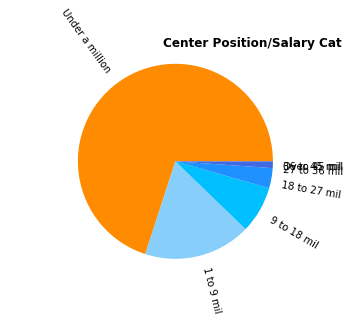

In [16]:
#makin pies- this was the initial visualization; a later version is the stacked bar
#pie labels were difficult to remove overlap on
center_pie = all_data.loc[all_data["Pos"]== "C"]
center_pie

center_pie_count = center_pie["Salary Categories"].value_counts()

colors1 = ("darkorange", "lightskyblue", "deepskyblue", "dodgerblue", "royalblue", "mediumblue", "midnightblue")
labels = bin_names

plt.pie(center_pie_count, colors = colors1, labels = labels, rotatelabels= True)
plt.title("Center Position/Salary Cat", loc= "right", fontweight= "bold")
plt.axis("equal")

In [17]:
#note how many indivs are in the visual and the mean salary for centers
center_pie_stats = center_pie["Salary"].describe()
center_pie_stats

count         90
mean     7411925
std      8358216
min       925258
25%      1701593
50%      4100000
75%      9720900
max     35361360
Name: Salary, dtype: float64

(-1.1000000174304803,
 1.1000000044986573,
 -1.121698743180493,
 1.1010332820929156)

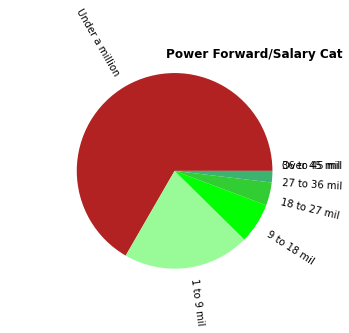

In [18]:
power_forward_pie = all_data.loc[all_data["Pos"]== "PF"]
power_forward_pie

pf_pie_count = power_forward_pie["Salary Categories"].value_counts()

colors2 = ("firebrick", "palegreen", "lime", "limegreen", "mediumseagreen", "green", "darkgreen")
labels = bin_names

plt.pie(pf_pie_count, colors = colors2, labels = labels, rotatelabels= True)
plt.title("Power Forward/Salary Cat", loc= "right", fontweight= "bold")
plt.axis("equal")

In [19]:
power_forward_stats = power_forward_pie["Salary"].describe()
power_forward_stats

count        105
mean     8225572
std      9511106
min      1250000
25%      1782621
50%      3902439
75%     10690909
max     42018900
Name: Salary, dtype: float64

(-1.1052034972495688,
 1.1002477855833128,
 -1.106152884077274,
 1.1034883422790445)

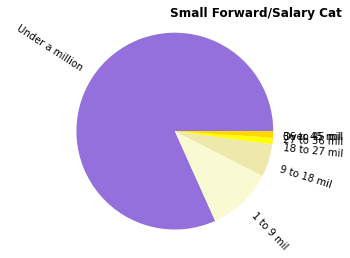

In [20]:
small_forward_pie = all_data.loc[all_data["Pos"]== "SF"]
small_forward_pie

sf_pie_count = small_forward_pie["Salary Categories"].value_counts()

colors3 = ("mediumpurple", "lightgoldenrodyellow", "palegoldenrod", "yellow", "gold", "goldenrod", "green", "darkgoldenrod")
labels = bin_names

plt.pie(sf_pie_count, colors = colors3, labels = labels, rotatelabels= True)
plt.title("Small Forward/Salary Cat", loc= "right", fontweight= "bold")
plt.axis("equal")

In [21]:
small_forward_stats = small_forward_pie["Salary"].describe()
small_forward_stats

count         93
mean     6619057
std      7926859
min      1057260
25%      1701593
50%      4235160
75%      6006420
max     36016200
Name: Salary, dtype: float64

(-1.1141905341886613,
 1.1006757397232696,
 -1.100536438220691,
 1.1112649386087314)

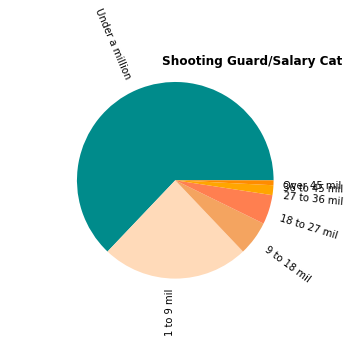

In [22]:
shooting_guard_pie = all_data.loc[all_data["Pos"]== "SG"]
shooting_guard_pie

sg_pie_count = shooting_guard_pie["Salary Categories"].value_counts()

colors4 = ("darkcyan", "peachpuff", "sandybrown", "coral", "orange", "darkorange", "orangered")
labels = bin_names

plt.pie(sg_pie_count, colors = colors4, labels = labels, rotatelabels= True)
plt.title("Shooting Guard/Salary Cat", loc= "right", fontweight= "bold")
plt.axis("equal")

In [23]:
shooting_guard_stats = shooting_guard_pie["Salary"].describe()
shooting_guard_stats

count        124
mean     8512443
std      8299012
min       925258
25%      2129370
50%      4500000
75%     12440000
max     37980720
Name: Salary, dtype: float64

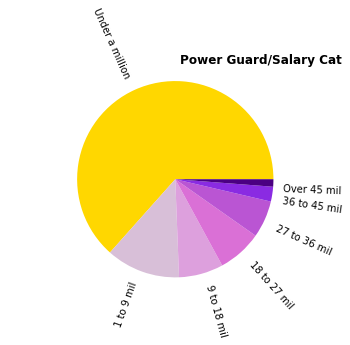

In [24]:
point_guard_pie = all_data.loc[all_data["Pos"]== "PG"]
point_guard_pie

pg_pie_count = point_guard_pie["Salary Categories"].value_counts()

colors5 = ("gold", "thistle", "plum", "orchid", "mediumorchid", "blueviolet", "indigo")
labels = bin_names

plt.pie(pg_pie_count, colors = colors5, labels = labels, rotatelabels= True)
plt.title("Power Guard/Salary Cat", loc= "right", fontweight= "bold")
plt.axis("equal")
plt.savefig("pg_sal_pie.png")
plt.show()

In [25]:
point_guard_stats = point_guard_pie["Salary"].describe()
point_guard_stats

count         82
mean    11406286
std     12612009
min       925258
25%      3000000
50%      5534106
75%     16232220
max     45780966
Name: Salary, dtype: float64

In [26]:
#creating variables to pass into a for loop to compare salary cat to position
position = ['C', 'PF', 'SG', 'SF', 'PG']
salary_unique = ['Under a million', '1 to 9 mil', '9 to 18 mil',
                 '18 to 27 mil', '27 to 36 mil', '36 to 45 mil', 
                 'Over 45 mil']

salary_pos_df = []

for pos in position:
    cat_list = []
    cat_list.append(pos)
    
    for sal in salary_unique:
        count_df = all_data.loc[(all_data['Salary Categories']==sal) & (all_data['Pos']==pos)]
        count = count_df.groupby('Salary Categories').agg({"Player":"count"})
        count = count['Player'].sum()
        cat_list.append(count)

    salary_pos_df.append(cat_list)

print(salary_pos_df)
salary_pos_df = pd.DataFrame(salary_pos_df)
salary_pos_df.set_index(salary_pos_df[0], inplace=True)
# salary_pos_df.drop(salary_pos_df[0], inplace=True)
salary_pos_df

[['C', 1, 63, 16, 3, 7, 0, 0], ['PF', 0, 70, 22, 7, 2, 4, 0], ['SG', 2, 78, 30, 7, 6, 1, 0], ['SF', 0, 76, 10, 1, 5, 1, 0], ['PG', 2, 52, 10, 6, 5, 6, 1]]


,0,1,2,3,4,5,6,7
0,,,,,,,,
C,C,1,63,16,3,7,0,0
PF,PF,0,70,22,7,2,4,0
SG,SG,2,78,30,7,6,1,0
SF,SF,0,76,10,1,5,1,0
PG,PG,2,52,10,6,5,6,1


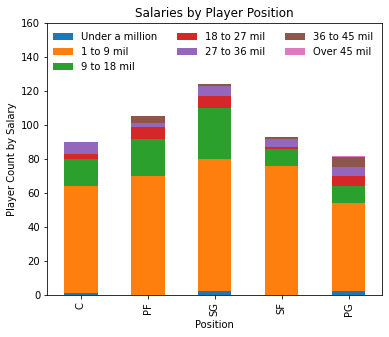

In [35]:
#stacked bar plot from the previous df
fig, ax = plt.subplots(facecolor="white")
salary_pos_df.plot.bar(stacked=True, ax=ax, figsize=(6,5))
plt.xlabel('Position')
plt.ylabel('Player Count by Salary')
plt.title('Salaries by Player Position')
plt.ylim(0,160)
plt.legend(loc= 'best', ncol=3, labels=salary_unique, frameon=False)
plt.savefig("sal_by_position.png")
plt.show()

In [28]:
#Worst and best PER overall
#min is -45, max is 37
#on Wikipedia, states that the average PER =15, and a (weak) MVP is above 25

PER_df = pd.DataFrame(all_data.loc[all_data['PER'] >20, :])
PER_df.max()

Player        Willy Hernangomez
G                            76
Salary                 45780966
PER                          37
YEAR_TOTAL                   19
dtype: object

In [29]:
PER_df.min()

Player        Andre Drummond
G                          2
Salary               1517981
PER                       20
YEAR_TOTAL                 0
dtype: object

In [30]:
PER_df = pd.DataFrame(all_data.loc[all_data['PER'] <0, :])
PER_df.max()

Player               Sharife Cooper
G                                13
Salary                          NaN
PER                              -0
YEAR_TOTAL                        4
Salary Categories               NaN
dtype: object

In [31]:
PER_df = pd.DataFrame(all_data.loc[all_data['PER'] <0, :])
PER_df.min()

Player               Anthony Lamb
G                               2
Salary                        NaN
PER                           -45
YEAR_TOTAL                      0
Salary Categories             NaN
dtype: object

In [32]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "Giannis Antetokounmpo", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
11,Giannis Antetokounmpo,PF,67,Giannis Antetokounmpo,39344970,32,9,36 to 45 mil


In [33]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "LeBron James", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
307,LeBron James,PF,56,LeBron James,41180544,26,19,36 to 45 mil


In [34]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "Kevin Durant", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
164,Kevin Durant,PF,55,Kevin Durant,42018900,26,15,36 to 45 mil


In [35]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "Stephen Curry", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
132,Stephen Curry,PG,64,Stephen Curry,45780966,21,13,Over 45 mil


In [36]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "Keon Johnson", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
321,Keon Johnson,SG,37,Keon Johnson,2553120,9,1,1 to 9 mil
322,Keon Johnson,SG,15,Keon Johnson,2553120,9,1,1 to 9 mil
323,Keon Johnson,SG,22,Keon Johnson,2553120,9,1,1 to 9 mil


In [37]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "Terrence Ross", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
514,Terrence Ross,SG,63,Terrence Ross,12500000,10,10,9 to 18 mil


In [38]:
famousnames_df = pd.DataFrame(all_data.loc[all_data['Player']== "Jalen Green", :])
famousnames_df

,Player,Pos,G,Name,Salary,PER,YEAR_TOTAL,Salary Categories
224,Jalen Green,SG,67,Jalen Green,8992200,12,1,1 to 9 mil


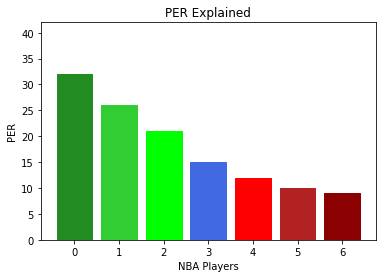

In [40]:
#bar plot visualizing some famous NBA Players' PER scores against the average
names = ["Giannis Antetokounmpo", "Kevin Durant", "Stephen Curry" "Average PER", "Jalen Green", "Terrence Ross", "Keon Johnson"]
famous_PER = [32, 26, 21, 15, 12, 10, 9]
x_axis = np.arange(len(famous_PER))

bars = plt.bar(x_axis, famous_PER, color = "b", align = "center")
tick_locations = ["names"]
#plt.ticks(tick_locations, names)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(famous_PER)+10)


bars[0].set_color('forestgreen')
bars[1].set_color('limegreen')
bars[2].set_color('lime')
bars[3].set_color('royalblue')
bars[4].set_color('red')
bars[5].set_color('firebrick')
bars[6].set_color('darkred')

plt.title("PER Explained")
plt.xlabel("NBA Players")
plt.ylabel("PER")

plt.savefig("PERexplained.png")
plt.show()